# Clustering

Rionaldi Chandraseta - 13515077

IF4071 - Pembelajaran Mesin

## Fungsi

Fungsi-fungsi berikut digunakan untuk membantu visualisasi data, evaluasi _cluster_, save/load model, dan pembuatan instans baru

### Visualisasi Data

In [1]:
import matplotlib.pyplot as plt
from itertools import combinations
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

def visualize_iris_3d(df_X, labels):
    coms = combinations([0,1,2,3], 3)
    elevation = [10, 10, 10, 10]
    azimuth = [45, 45, 45, 45]
    
    fig = plt.figure(figsize=(15,10))
    for idx, com in enumerate(coms):
        ax = fig.add_subplot(2, 2, (idx+1), projection='3d')
        ax.scatter3D(df_X.values[:, com[0]], df_X.values[:, com[1]], df_X.values[:, com[2]], c=labels, cmap='copper')
        ax.set_xlabel(df_X.columns[com[0]])
        ax.set_ylabel(df_X.columns[com[1]])
        ax.set_zlabel(df_X.columns[com[2]])
        ax.view_init(elevation[idx], azimuth[idx])
    plt.show()

### Evaluasi _Cluster_

In [2]:
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import v_measure_score

def evaluate_clustering_predictions(labels, predictions):
    print("Adjusted Random Score: {}".format(adjusted_rand_score(labels, predictions)))
    print("V-Measure: {}".format(v_measure_score(labels, predictions)))

### Save/Load Model

In [3]:
import dill

def save_model(model, filename):
    filepath = '../model/' + filename + '.mdl'
    dill.dump(model, open(filepath, 'wb'))

def load_model(filename):
    filepath = '../model/' + filename + '.mdl'
    return dill.load(open(filepath, 'rb'))

### Pembangkitan Instans

In [4]:
import numpy as np

def generate_instances(n_instances, instance_class='', auto=True):
    possible_instance_class = ['setosa', 'versicolor', 'virginica']
    new_instances = np.empty((n_instances, 4))
    
    if auto:
        if instance_class.lower() in possible_instance_class:
            print('Generating {} iris {} instance(s)'.format(n_instances, instance_class.lower()))
            
            if instance_class.lower() == 'setosa':
                # The following numbers are taken from section 'Analyzing Data Distribution to Generate New Instance'
                setosa_means = [5.0060, 3.4180, 1.4640, 0.2440]
                setosa_stds = [0.3489, 0.3772, 0.1718, 0.1061]
                
                col1 = np.random.normal(setosa_means[0], setosa_stds[0], n_instances)
                col2 = np.random.normal(setosa_means[1], setosa_stds[1], n_instances)
                col3 = np.random.normal(setosa_means[2], setosa_stds[2], n_instances)
                col4 = np.random.normal(setosa_means[3], setosa_stds[3], n_instances)
                
            elif instance_class.lower() == 'versicolor':
                # The following numbers are taken from section 'Analyzing Data Distribution to Generate New Instance'
                versicolor_means = [5.9360, 2.7700, 4.2600, 1.3260]
                versicolor_stds = [0.5110, 0.3106, 0.4652, 0.1958]
                
                col1 = np.random.normal(versicolor_means[0], versicolor_stds[0], n_instances)
                col2 = np.random.normal(versicolor_means[1], versicolor_stds[1], n_instances)
                col3 = np.random.normal(versicolor_means[2], versicolor_stds[2], n_instances)
                col4 = np.random.normal(versicolor_means[3], versicolor_stds[3], n_instances)
                
            elif instance_class.lower() == 'virginica':
                # The following numbers are taken from section 'Analyzing Data Distribution to Generate New Instance'
                virginica_means = [6.5880, 2.9740, 5.5520, 2.0260]
                virginica_stds = [0.6295, 0.3193, 0.5463, 0.2719]
                
                col1 = np.random.normal(virginica_means[0], virginica_stds[0], n_instances)
                col2 = np.random.normal(virginica_means[1], virginica_stds[1], n_instances)
                col3 = np.random.normal(virginica_means[2], virginica_stds[2], n_instances)
                col4 = np.random.normal(virginica_means[3], virginica_stds[3], n_instances)
            
            for n in range(n_instances):
                new_instance = np.zeros(4)

                new_instance[0] = col1[n]
                new_instance[1] = col2[n]
                new_instance[2] = col3[n]
                new_instance[3] = col4[n]
                new_instances[n] = new_instance
        else:
            raise ValueError('Unsupported value for instance_class. Must be one of these [\'setosa\', \'versicolor\', \'virginica\']')
    else:
        for n in range(n_instances):
            new_instance = np.zeros(4) # From the number of attribute in Iris dataset
            print("Instance {}".format(n))
            
            # Very bad code, with assumption user will always input number (int/float)
            new_instance[0] = input("Sepal length (cm): ")
            new_instance[1] = input("Sepal width (cm): ")
            new_instance[2] = input("Petal length (cm): ")
            new_instance[3] = input("Petal width (cm): ")
            new_instances[n] = new_instance
        
    return new_instances

## Pembacaan Dataset

### Iris

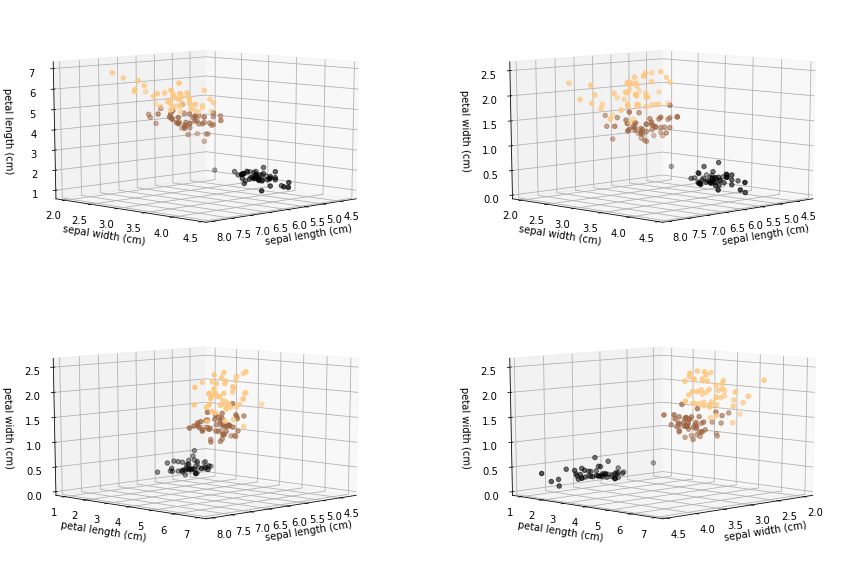

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import datasets

iris_dataset = datasets.load_iris()
iris_dataframe = pd.DataFrame(data=np.c_[iris_dataset['data'], iris_dataset['target']],
                              columns=iris_dataset['feature_names'] + ['target'])

iris_X = iris_dataframe.iloc[:, 0:4]
iris_y = iris_dataframe.iloc[:, 4:]

visualize_iris_3d(iris_X, iris_dataframe.target)

### Play Tennis

In [6]:
play_tennis_dataframe = pd.read_csv('../data/play_tennis.csv', sep=',')

pt_X = play_tennis_dataframe.iloc[:, 0:4]
pt_y = play_tennis_dataframe.iloc[:, 4:]

play_tennis_dataframe

,outlook,temperature,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,norml,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


## Algoritma _Clustering_

### K-Means

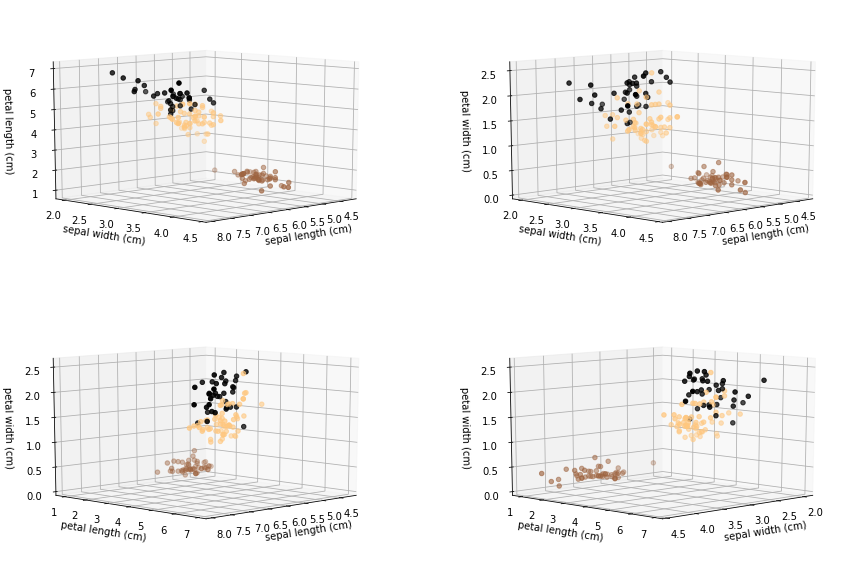

Adjusted Random Score: 0.7302382722834697
V-Measure: 0.7581756800057784


In [7]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3)
k_means.fit(iris_X)

visualize_iris_3d(iris_X, k_means.labels_)

evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), k_means.labels_)

Parameter yang bisa digunakan oleh KMeans:
- **n_clusters**: menentukan jumlah _cluster_ dan centroid yang dihasilkan oleh model
- **init**: menentukan metode untuk inisialisasi
- **n_init**: menentukan jumlah berapa kali algoritma K-Means akan dijalankan dengan _seed_ centroid berbeda
- **max_iter**: menentukan jumlah iterasi maksimal setiap kali menjalankan algoritma K-Means
- **tol**: menentukan toleransi relatif terhadap inertia untuk menentukan apakah sudah konvergen
- **precompute_distances**: menentukan apakah dilakukan penghitungan jarak setiap sampel dengan setiap _cluster_ di awal
- **verbose**: menentukan seberapa banyak informasi log yang ditampilkan
- **random_state**: menentukan _seed_ bagi RNG
- **copy_x**: menentukan apakah data original dicopy terlebih dahulu sebelum diproses agar tidak berubah
- **n_jobs**: menentukan jumlah pekerjaan paralel yang dijalankan dalam perhitungan
- **algorithm**: menentukan algoritma K-Means yang digunakan, terdapat pilihan "full" atau "elkan"

### Agglomerative Clustering

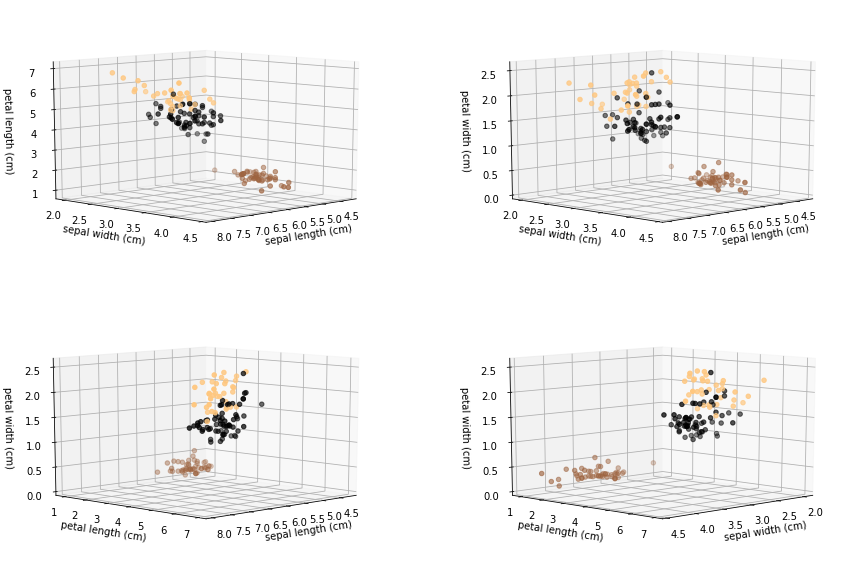

Adjusted Random Score: 0.7311985567707745
V-Measure: 0.7700836616487869


In [8]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(iris_X)

visualize_iris_3d(iris_X, agg_clustering.labels_)

evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), agg_clustering.labels_)

Parameter yang bisa digunakan oleh Agglomerative Clustering:
- **n_clusters**: menentukan jumlah _cluster_ yang dihasilkan
- **affinity**: menentukan metrik yang digunakan untuk menghitung _linkage_ antar data
- **memory**: menentukan direktori yang digunakan untuk _caching_. Jika None, maka tidak akan dilakukan _caching_
- **connectivity**: menentukan matriks konektifitas dari data. Jika None, maka data dianggap tidak terstruktur
- **compute_full_tree**: hanya berguna jika matriks konektifitas ditentukan. Menentukan apakah pembangkitan pohon berhenti setelah n_clusters
- **linkage**: menentukan _linkage criterion_ yang digunakan, yaitu jarak dari data yang dilakukan _clustering_
- **pooling_func**: menentukan nilai dari fitur yang telah digabungkan pada satu _cluster_

### DBSCAN

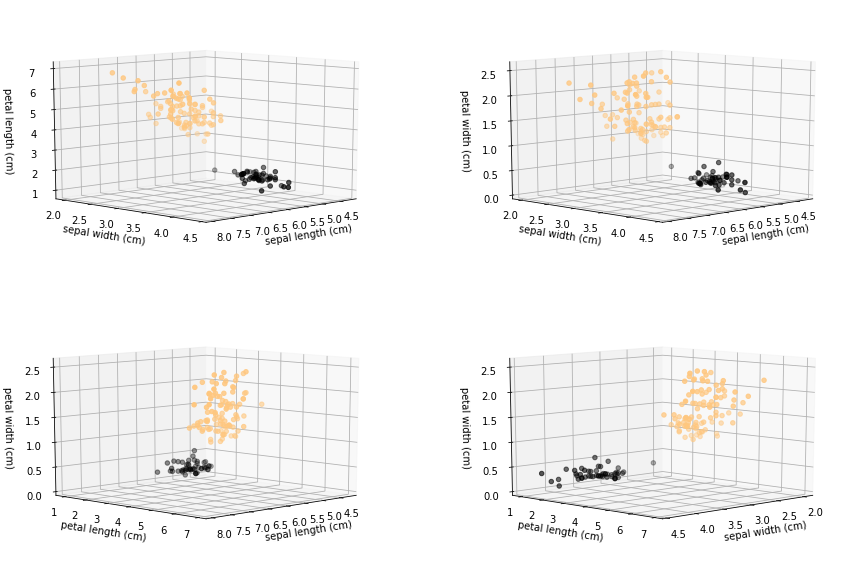

Adjusted Random Score: 0.5681159420289855
V-Measure: 0.7336804366512104


In [9]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.90, min_samples=10)
dbscan.fit(iris_X)

visualize_iris_3d(iris_X, dbscan.labels_)

evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), dbscan.labels_)

Untuk algoritma DBSCAN, cukup sulit untuk menentukan parameter yang menghasilkan 3 _cluster_, karena tidak ada parameter yang langsung menentukan berapa _cluster_ yang dihasilkan. _Tuning_ parameter yang dilakukan adalah pada argumen `eps` dan `min_samples`. Untuk mendapatkan 3 _cluster_, ditemukan nilai `eps=0.81` dan `min_samples=1`. Tetapi, nilai V-Measure dan Adjusted Random Score tertinggi tercapai ketika nilai `eps=0.90` dan `min_samples=10`. Oleh karena itu, dipilih nilai `eps=90` dan `min_samples=10` walaupun hanya menghasilkan 2 _cluster_.

Parameter yang bisa digunakan oleh DBSCAN:
- **eps**: menentukan jarak maksimum antara dua data agar dianggap sebagai tetangga
- **min_samples**: menentukan jumlah data bertetangga minimum agar sebuah data dianggap sebagai _core point_
- **metric**: menentukan metrik yang digunakan untuk menghitung jarak antar data
- **metric_params**: parameter tambahan untuk fungsi metrik
- **algorithm**: menentukan algoritma yang digunakan oleh modul NearestNeighbors untuk menentukan jarak dan mencari tetangga terdekat
- **leaf_size**: hanya digunakan jika algoritma='ball_tree' atau 'kd_tree'. Menentukan jumlah daun yang dibangkitkan
- **p**: menentukan _power_ dari metrik Minkowski yang digunakan untuk menghitung jarak antar titik
- **n_jobs**: menentukan jumlah pekerjaan paralel yang dijalankan dalam perhitungan

### Gaussian Mixtures

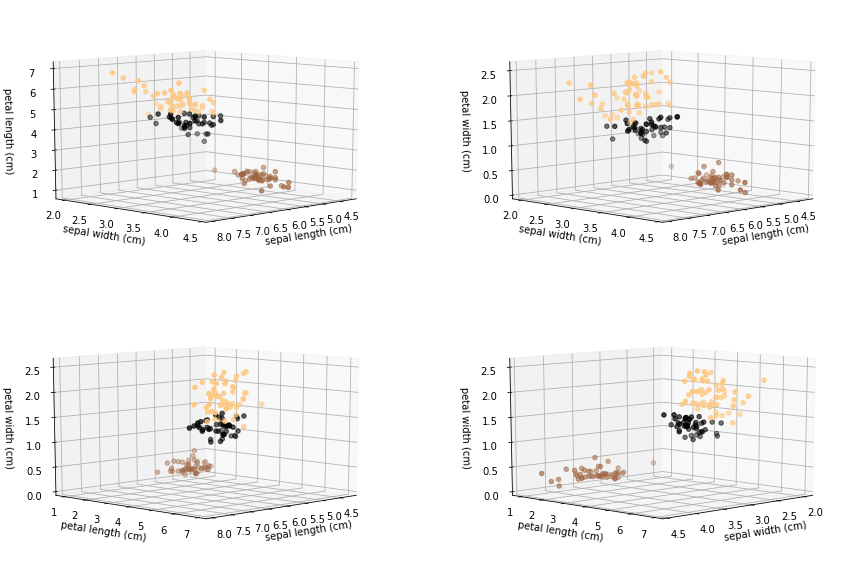

Adjusted Random Score: 0.9038742317748124
V-Measure: 0.8996935451597475


In [10]:
from sklearn.mixture import GaussianMixture

gauss_mix = GaussianMixture(n_components=3)
gauss_mix.fit(iris_X)

gauss_labels = gauss_mix.predict(iris_X)

visualize_iris_3d(iris_X, gauss_labels)

evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), gauss_labels)

Parameter yang bisa digunakan oleh Gaussian Mixture:
- **n_components**: menentukan jumlah dari komponen _mixture_ (_cluster_)
- **covariance_type**: menentukan parameter kovarians yang digunakan
- **tol**: menentukan _threshold_ untuk konvergen
- **reg_covar**: regularisasi non-negatif yang digunakan untuk memastikan matriks kovarians bernilai positif
- **max_iter**: menentukan jumlah iterasi EM yang dilakukan
- **n_init**: menentukan jumlah inisialisasi yang dilakukan, hasil terbaik yang akah disimpan
- **init_params**: menentukan metode untuk menginisialisasi berat, _means_, dan _precisions_
- **weights_init**: menentukan berat awal secara manual. Jika None, penentuan berat awal akan dilakukan dengan metode pada init_params
- **means_init**: menentukan _means_ awal secara manual. Jika None, penentuan _means_ awal akan dilakukan dengan metode pada init_params
- **precisions_init**: menentukan _precisions_ awal secara manual. Jika None, maka penentuan _precisions_ awal akan dilakukan dengan metode pada init_params
- **random_state**: menentukan _seed_ bagi RNG
- **warm_start**: menentukan apakah solusi dari pemanggilan fit akan digunakan dalam pemanggilan fit setelahnya
- **verbose**: menentukan seberapa banyak informasi log yang ditampilkan
- **verbose_interval**: menentukan berapa banyak iterasi yang dilakukan sebelum menampilkan informasi log

### K-Medoids 

Menggunakan library [pyclustering](https://pypi.org/project/pyclustering/)

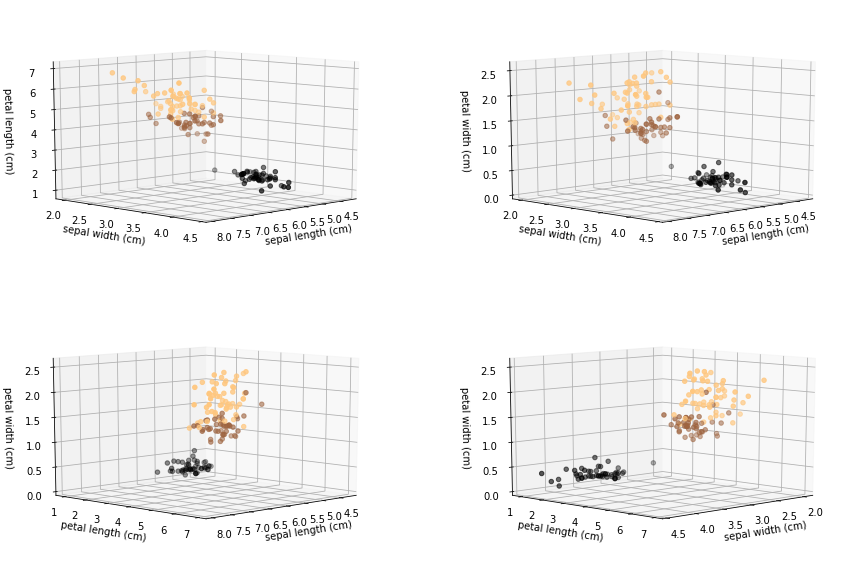

Adjusted Random Score: 0.8022085453675192
V-Measure: 0.8024440070096258


In [11]:
from pyclustering.cluster.kmedoids import kmedoids

initial_medoids = [0, 75, 149]
k_medoids = kmedoids(iris_X.values, initial_medoids)
k_medoids.process()

k_medoids_clusters = k_medoids.get_clusters()

k_medoids_labels = [0] * len(iris_y)

# Convert the result from .get_clusters() to labels for visualization
for label, cluster in enumerate(k_medoids_clusters):
    for index in cluster:
        k_medoids_labels[index] = label
        
visualize_iris_3d(iris_X, k_medoids_labels)


evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), k_medoids_labels)

Parameter yang bisa digunakan oleh K-Medoids:
- **data**: data input yang akan diproses dengan algoritma _clustering_
- **initial_index_medoids**: menentukan indeks dari medoids inisial
- **tolerance**: menentukan kondisi stop (konvergen), jika perubahan jarak medoid maksimal kurang dari nilai tolerance, maka algoritma akan berhenti
- **ccore**: jika True, maka akan menggunakan _library_ CCORE

### Graph-Based Clustering

Menggunakan library [mst_clustering](https://pypi.org/project/mst_clustering/)

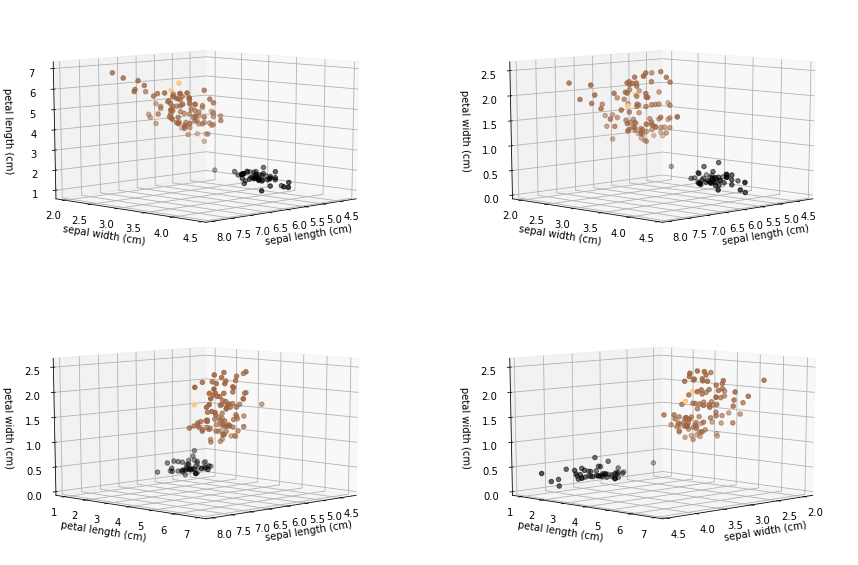

Adjusted Random Score: 0.5637510205230709
V-Measure: 0.7174643320814477


In [12]:
from mst_clustering import MSTClustering

graph_clustering = MSTClustering(cutoff=2)
graph_clustering_labels = graph_clustering.fit_predict(iris_X)

visualize_iris_3d(iris_X, graph_clustering_labels)

evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), graph_clustering_labels)

Parameter yang bisa digunakan oleh mst_clustering:
- **cutoff**: menentukan jumlah sisi yang dihilangkan, menentukan jumlah _cluster_ juga
- **cutoff_scale**: menentukan panjang sisi maximum, sisi yang lebih panjang akan otomatis dihilangkan
- **min_cluster_size**: menentukan jumlah minimum anggota setiap _cluster_
- **approximate**: jika True, maka MST dihitung menggunakan tetangga yang berdekatan sejumlah `n_neighbors`. Jika False, maka akan menghitung jarak antar setiap data
- **n_neighbors**: menentukan jumlah maksimal tetangga yang berdekatan, hanya digunakan jika `approximate=True`
- **metric**: menentukan metrik yang digunakan dalam perhitungan jarak
- **metric_params**: 

### Grid Clustering

Menggunakan library [pyclustering](https://pypi.org/project/pyclustering/)

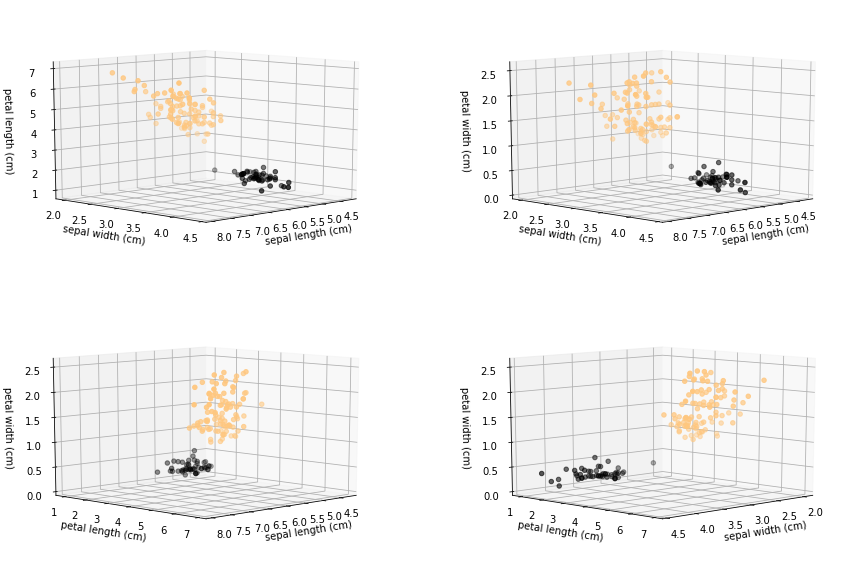

Adjusted Random Score: 0.5681159420289855
V-Measure: 0.7336804366512104


In [13]:
from pyclustering.cluster.bang import bang

grid_clustering = bang(iris_X.values.tolist(), levels=13)
grid_clustering.process()

grid_clustering_clusters = grid_clustering.get_clusters()

grid_clustering_labels = [0] * len(iris_y)

# Convert the result from .get_clusters() to labels for visualization
for label, cluster in enumerate(grid_clustering_clusters):
    for index in cluster:
        grid_clustering_labels[index] = label

visualize_iris_3d(iris_X, grid_clustering_labels)

evaluate_clustering_predictions(iris_y.values.reshape(len(iris_y.values)), grid_clustering_labels)

Untuk algoritma bang, nilai yang dihasilkan oleh _adjusted random score_ dan _v-measure_ rendah karena jumlah _cluster_ yang dihasilkan hanya 2. Hasil ini dicapai ketika nilai `levels=13`. Ketika nilai levels diset 14, jumlah _cluster_ yang dihasilkan adalah 4, sehingga dipilih untuk tetap menggunakan 13 sebagai nilai levels

Parameter yang bisa digunakan oleh bang:
- **data**: data input yang akan diproses dengan algoritma _clustering_
- **levels**: jumlah tingkatan pada pohon yang digunakan untuk melakukan _splitting_
- **ccore**: belum diimplementasikan untuk saat ini
- **kwargs**: _keyword_ argumen tambahan, _optional_

## Save/Load Model

In [14]:
save_model(k_means, 'k_means')
save_model(agg_clustering, 'agglomerative_clustering')
save_model(dbscan, 'dbscan')
save_model(gauss_mix, 'gaussian_mixtures')
save_model(k_medoids, 'k_medoids')
save_model(graph_clustering, 'graph_based_clustering')
save_model(grid_clustering, 'grid_based_clustering')

## Analyzing Data Distribution to Generate New Instance

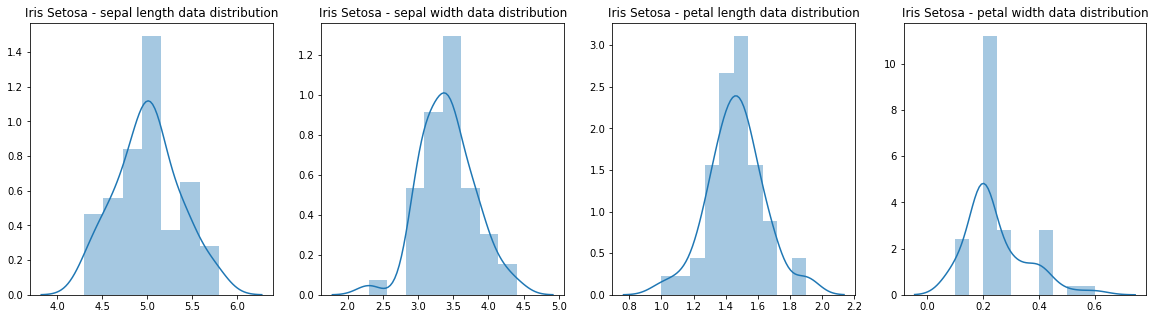

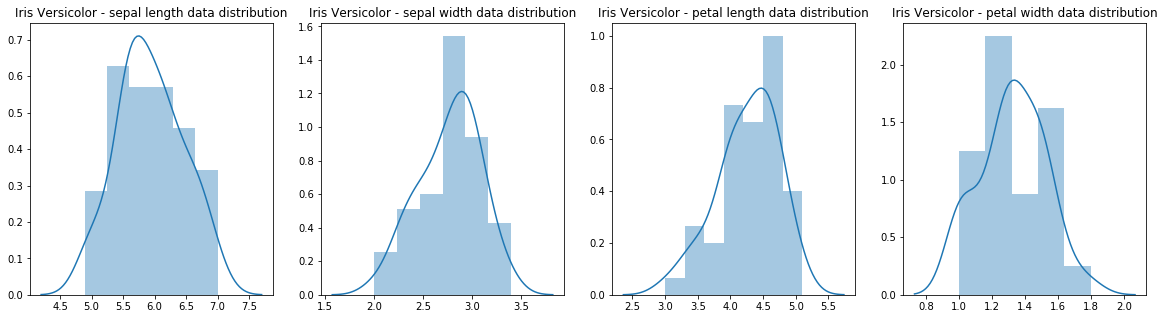

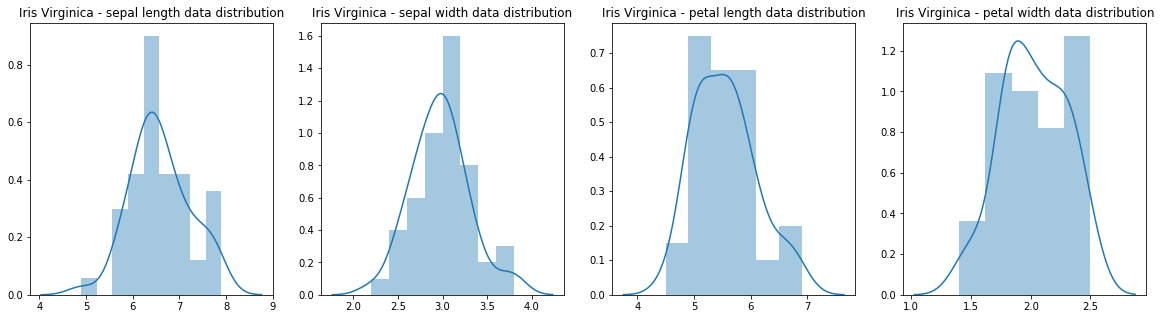

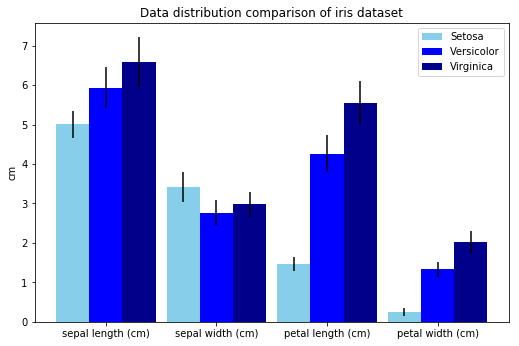

In [15]:
import seaborn as sns

iris_setosa = iris_dataframe[(iris_dataframe.target == 0)].iloc[:, 0:4]
iris_versicolor = iris_dataframe[(iris_dataframe.target == 1)].iloc[:, 0:4]
iris_virginica = iris_dataframe[(iris_dataframe.target == 2)].iloc[:, 0:4]

iris_setosa_means = [0, 0, 0, 0]
iris_setosa_stds = [0, 0, 0, 0]
for idx, column in enumerate(iris_setosa):
    iris_setosa_means[idx] = np.mean(iris_setosa[column].values)
    iris_setosa_stds[idx] = np.std(iris_setosa[column].values)

iris_versicolor_means = [0, 0, 0, 0]
iris_versicolor_stds = [0, 0, 0, 0]
for idx, column in enumerate(iris_versicolor):
    iris_versicolor_means[idx] = np.mean(iris_versicolor[column].values)
    iris_versicolor_stds[idx] = np.std(iris_versicolor[column].values)

iris_virginica_means = [0, 0, 0, 0]
iris_virginica_stds = [0, 0, 0, 0]
for idx, column in enumerate(iris_setosa):
    iris_virginica_means[idx] = np.mean(iris_virginica[column].values)
    iris_virginica_stds[idx] = np.std(iris_virginica[column].values)

# Display data distribution of Iris Setosa
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for idx, column in enumerate(iris_setosa):
    ax[idx].set_title('Iris Setosa - {} data distribution'.format(column[:-5]))
    sns.distplot(iris_setosa[column].values, ax=ax[idx])

# Display data distribution of Iris Versicolor
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for idx, column in enumerate(iris_versicolor):
    ax[idx].set_title('Iris Versicolor - {} data distribution'.format(column[:-5]))
    sns.distplot(iris_versicolor[column].values, ax=ax[idx])
    
# Display data distribution of Iris Virginica
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
for idx, column in enumerate(iris_virginica):
    ax[idx].set_title('Iris Virginica - {} data distribution'.format(column[:-5]))
    sns.distplot(iris_virginica[column].values, ax=ax[idx])

    
# Display the means and stds difference
indices = np.arange(len(iris_setosa_means))
bar_width = 0.3

fig, ax = plt.subplots()
fig.set_size_inches(8.5, 5.5)
bar1_setosa = ax.bar(indices - bar_width, iris_setosa_means, bar_width, yerr=iris_setosa_stds,
                     color='SkyBlue', label='Setosa')
bar2_versicolor = ax.bar(indices, iris_versicolor_means, bar_width, yerr=iris_versicolor_stds,
                     color='Blue', label='Versicolor')
bar3_virginica = ax.bar(indices + bar_width, iris_virginica_means, bar_width, yerr=iris_virginica_stds,
                     color='DarkBlue', label='Virginica')
ax.set_title('Data distribution comparison of iris dataset')
ax.set_ylabel('cm')
ax.set_xticks(indices)
ax.set_xticklabels(iris_setosa.columns.tolist())
ax.legend()

plt.show()

Dari hasil _plotting_ distribusi data di atas, dapat disimpulkan bahwa distribusi data mendekati distribusi Normal. Oleh karena itu, kita dapat membangkitkan data baru dengan menggunakan nilai _means_ dan _standard deviations_ dari setiap kolom dari setiap kelas.

In [16]:
print("Setosa - means: {} - stds: {}".format(['%.4f' % x for x in iris_setosa_means],['%.4f' % x for x in iris_setosa_stds]))
print("Versicolor - means: {} - stds: {}".format(['%.4f' % x for x in iris_versicolor_means],['%.4f' % x for x in iris_versicolor_stds]))
print("Virginica - means: {} - stds: {}".format(['%.4f' % x for x in iris_virginica_means],['%.4f' % x for x in iris_virginica_stds]))

Setosa - means: ['5.0060', '3.4180', '1.4640', '0.2440'] - stds: ['0.3489', '0.3772', '0.1718', '0.1061']
Versicolor - means: ['5.9360', '2.7700', '4.2600', '1.3260'] - stds: ['0.5110', '0.3106', '0.4652', '0.1958']
Virginica - means: ['6.5880', '2.9740', '5.5520', '2.0260'] - stds: ['0.6295', '0.3193', '0.5463', '0.2719']


_Means_ dan _standard deviations_ dari setiap kelas digunakan dalam fungsi `generate_instances` yang terdapat pada bagian pertama, **Fungsi**

## Generating New Instance & Load Model

In [17]:
def test_new_instances(n_instances=10, instance_class='setosa', auto=True):
    instances = generate_instances(n_instances, instance_class, auto)

    # Test load for all models
    loaded_k_means = load_model('k_means')
    loaded_agg_clustering = load_model('agglomerative_clustering')
    loaded_dbscan = load_model('dbscan')
    loaded_gauss_mix = load_model('gaussian_mixtures')
    loaded_k_medoids = load_model('k_medoids')
    loaded_graph_clustering = load_model('graph_based_clustering')
    loaded_grid_clustering = load_model('grid_based_clustering')

    # Append iris_X with instances before performing refitting on some models without predict method
    new_iris_X_values = np.concatenate((iris_X.values, instances), axis=0)

    print('K-Means prediction: {}'.format(k_means.predict(instances)))

    loaded_agg_clustering.fit(new_iris_X_values)
    print('Agglomerative Clustering prediction: {}'.format(loaded_agg_clustering.labels_[-n_instances:]))

    loaded_dbscan.fit(new_iris_X_values)
    print('DBSCAN prediction: {}'.format(loaded_dbscan.labels_[-n_instances:]))

    print('Gaussian Mixture prediction: {}'.format(loaded_gauss_mix.predict(instances)))

    initial_medoids = [0, 75, 149]
    new_k_medoids = kmedoids(new_iris_X_values, initial_medoids)
    new_k_medoids.process()
    new_k_medoids_clusters = new_k_medoids.get_clusters()
    new_k_medoids_labels = [0] * len(new_iris_X_values)
    # Convert the result from .get_clusters() to labels
    for label, cluster in enumerate(new_k_medoids_clusters):
        for index in cluster:
            new_k_medoids_labels[index] = label
    print('K-Medoids prediction: {}'.format(new_k_medoids_labels[-n_instances:]))

    print('Graph Based Clustering prediction: {}'.format(loaded_graph_clustering.fit_predict(new_iris_X_values)[-n_instances:]))

    new_grid_clustering = bang(new_iris_X_values.tolist(), levels=13)
    new_grid_clustering.process()
    new_grid_clustering_clusters = new_grid_clustering.get_clusters()
    new_grid_clustering_labels = [0] * len(new_iris_X_values)
    # Convert the result from .get_clusters() to labels
    for label, cluster in enumerate(new_grid_clustering_clusters):
        for index in cluster:
            new_grid_clustering_labels[index] = label
    print('Grid Based Clustering prediction: {}'.format(new_grid_clustering_labels[-n_instances:]))

In [18]:
test_new_instances(n_instances=10, instance_class='setosa')

Generating 10 iris setosa instance(s)
K-Means prediction: [1 1 1 1 1 1 1 1 1 1]
Agglomerative Clustering prediction: [1 1 1 1 1 1 1 1 1 1]
DBSCAN prediction: [0 0 0 0 0 0 0 0 0 0]
Gaussian Mixture prediction: [1 1 1 1 1 1 1 1 1 1]
K-Medoids prediction: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Graph Based Clustering prediction: [0 0 0 0 0 0 0 0 0 0]
Grid Based Clustering prediction: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [19]:
test_new_instances(n_instances=10, instance_class='versicolor')

Generating 10 iris versicolor instance(s)
K-Means prediction: [2 2 2 2 2 2 2 2 2 2]
Agglomerative Clustering prediction: [0 0 0 0 0 0 0 0 0 0]
DBSCAN prediction: [1 1 1 1 1 1 1 1 1 1]
Gaussian Mixture prediction: [0 0 2 0 0 0 0 0 0 0]
K-Medoids prediction: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Graph Based Clustering prediction: [1 1 1 1 1 1 1 1 1 1]
Grid Based Clustering prediction: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [20]:
test_new_instances(n_instances=10, instance_class='virginica')

Generating 10 iris virginica instance(s)
K-Means prediction: [2 0 0 2 0 0 0 0 0 0]
Agglomerative Clustering prediction: [0 2 2 0 2 2 2 2 2 2]
DBSCAN prediction: [1 1 1 1 1 1 1 1 1 1]
Gaussian Mixture prediction: [2 2 2 2 2 2 2 2 2 2]
K-Medoids prediction: [1, 2, 2, 1, 2, 2, 2, 2, 2, 2]
Graph Based Clustering prediction: [1 1 1 1 1 1 1 1 1 1]
Grid Based Clustering prediction: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


Hasil _assignment_ dari generasi ketiga kelas cukup menarik. Berikut adalah beberapa kesimpulan yang bisa ditarik.

1. _K-Means_ cukup baik dalam mengklasifikasikan data, hanya terdapat dua data yang berbeda yaitu pada instans dengan kelas _virginica_.
2. _Agglomerative Clustering_ juga cukup baik karena dapat mengklasifikasikan hampir semua data secara tepat, dua data yang berbeda yaitu pada instans dengan kelas _virginica_.
3. DBSCAN berhasil memprediksi semua kelas _setosa_ namun menggabungkan kelas _versicolor_ dan _virginica_ karena parameter yang dipilih hanya dapat menghasilkan 2 _cluster_
4. Gaussian Mixture memiliki _adjusted random score_ tertinggi, dan berhasil mengklasifikasikan semua data hasil generasi secara tepat
5. K-Medoids juga menghasilkan hasil prediksi yang cukup baik karena hanya ada dua instans kelas _virginica_ yang salah diklasifikasikan
6. Graph Based Clustering berhasil memprediksi semua instans dengan kelas _setosa_, tetapi menyatukan kelas _versicolor_ dan _virginica_ karena hanya dapat menghasilkan 2 _cluster_
7. Grid Based Clustering juga gagal memisahkan kelas _versicolor_ dan _virginica_ karena hanya dapat menghasilkan 2 _cluster_

_Catatan: hasil yang didapatkan ketika melakukan penjalanan notebook dapat berbeda karena hasil instans yang dibangkitkan tidak disimpan_